C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\28856525.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_responses = df.groupby('EDUC_bins')[longitudinal].mean().reset_index()
c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.ge

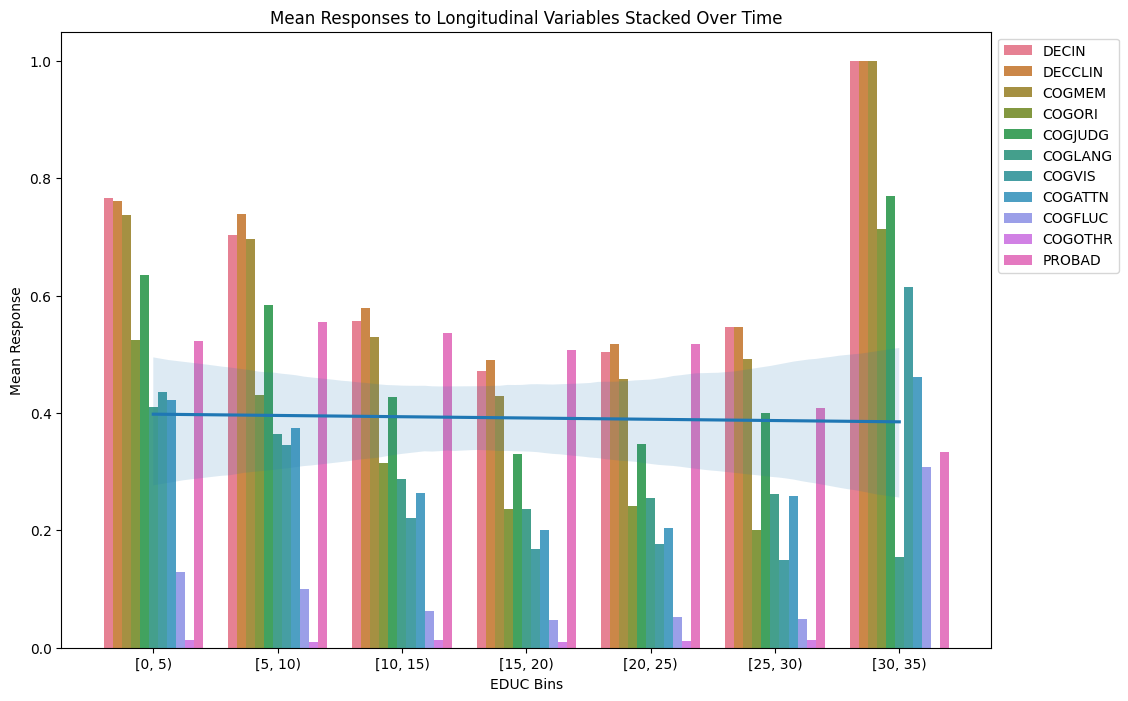

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('experiment1.0.csv')
id = ['NACCID', 'NACCVNUM']
cross_sectional = ['EDUC', 'COGFLAGO']
longitudinal = ['DECIN', 'DECCLIN', 'COGMEM', 'COGORI', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGFLUC', 'COGOTHR', 'PROBAD']

# Create a new column for the EDUC bins
bin_edges = np.arange(0, 37, 5)
df['EDUC_bins'] = pd.cut(df['EDUC'], bins=bin_edges, include_lowest=True, right=False)
df = df.sort_values(by='EDUC_bins')

# Group by EDUC bins and calculate the mean for each longitudinal variable
mean_responses = df.groupby('EDUC_bins')[longitudinal].mean().reset_index()

# Melt the DataFrame to long format for better handling in Seaborn
mean_responses_melted = pd.melt(mean_responses, id_vars='EDUC_bins', var_name='Variable', value_name='Mean Response')
#Statistical Analysis


# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='EDUC_bins', y='Mean Response', hue='Variable', data=mean_responses_melted)
sns.regplot(x=mean_responses_melted['EDUC_bins'].cat.codes, y=mean_responses_melted['Mean Response'], scatter=False, ax=plt.gca())

plt.xlabel('EDUC Bins')
plt.ylabel('Mean Response')
plt.title('Mean Responses to Longitudinal Variables Stacked Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\3587206420.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['EDUC_bins'] = pd.cut(df_trimmed['EDUC'], bins=bin_edges, include_lowest=True, right=False)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\3587206420.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_responses = df_trimmed.groupby('EDUC_bins')[longitudinal].mean().reset_index()
c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pa

Table exported to: mean_responses_diff.csv


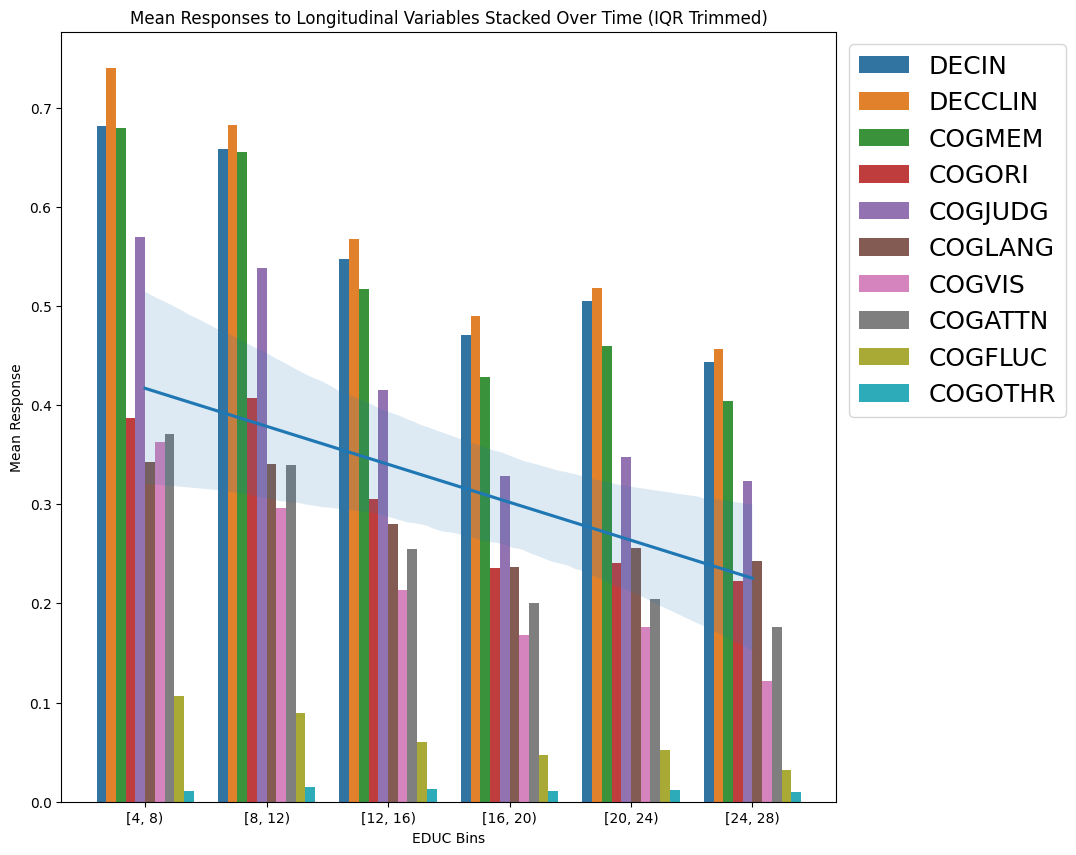

In [24]:
from tabulate import tabulate
df = pd.read_csv('experiment1.0.csv')
id = ['NACCID', 'NACCVNUM']
cross_sectional = ['EDUC', 'COGFLAGO']
longitudinal = ['DECIN', 'DECCLIN', 'COGMEM', 'COGORI', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGFLUC', 'COGOTHR']
# Calculate the IQR for the 'EDUC' column
bin_edges = np.arange(0, 37, 4)
Q1 = df['EDUC'].quantile(0.25)
Q3 = df['EDUC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trim the DataFrame to only include rows where the 'EDUC' value is within the IQR
df_trimmed = df[(df['EDUC'] >= lower_bound) & (df['EDUC'] <= upper_bound)]

# Create a new column for the EDUC bins
df_trimmed['EDUC_bins'] = pd.cut(df_trimmed['EDUC'], bins=bin_edges, include_lowest=True, right=False)

# Sort the 'EDUC_bins' column
df_trimmed = df_trimmed.sort_values(by='EDUC_bins')

# Group by EDUC bins and calculate the mean for each longitudinal variable
mean_responses = df_trimmed.groupby('EDUC_bins')[longitudinal].mean().reset_index()

# Melt the DataFrame to long format for better handling in Seaborn
mean_responses_melted = pd.melt(mean_responses, id_vars='EDUC_bins', var_name='Variable', value_name='Mean Response')
#Statistical Analysis
mean_responses_diff = mean_responses.copy()
for variable in longitudinal:
    mean_responses_diff[variable + '_change'] = mean_responses[variable].diff()
table_data = mean_responses_diff[['EDUC_bins'] + [f'{variable}_change' for variable in longitudinal]]
table = tabulate(table_data, headers='keys', tablefmt='fancy_grid', showindex=False)
export_data = mean_responses_diff[['EDUC_bins'] + [f'{variable}_change' for variable in longitudinal]]

# Define the output CSV file path
output_csv_path = 'mean_responses_diff.csv'

# Export the DataFrame to CSV
export_data.to_csv(output_csv_path, index=False)

print(f'Table exported to: {output_csv_path}')

# Plot the stacked bar chart
plt.figure(figsize=(10,10))
sns.barplot(x='EDUC_bins', y='Mean Response', hue='Variable', data=mean_responses_melted)

sns.regplot(x=mean_responses_melted['EDUC_bins'].cat.codes, y=mean_responses_melted['Mean Response'], scatter=False, ax=plt.gca())

plt.xlabel('EDUC Bins')
plt.ylabel('Mean Response')
plt.title('Mean Responses to Longitudinal Variables Stacked Over Time (IQR Trimmed)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 18})
plt.show()

### Finishing touches on the graph
1. Experiment with a couple different bin groupings.
2. Get some statistics about achieveing some Post college education. (2 year bin?)


C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\4126993103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['EDUC_bins'] = pd.cut(df_trimmed['EDUC'], bins=bin_edges, include_lowest=True, right=False)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\4126993103.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_responses = df_trimmed.groupby('EDUC_bins')[longitudinal].mean().reset_index()
c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pa

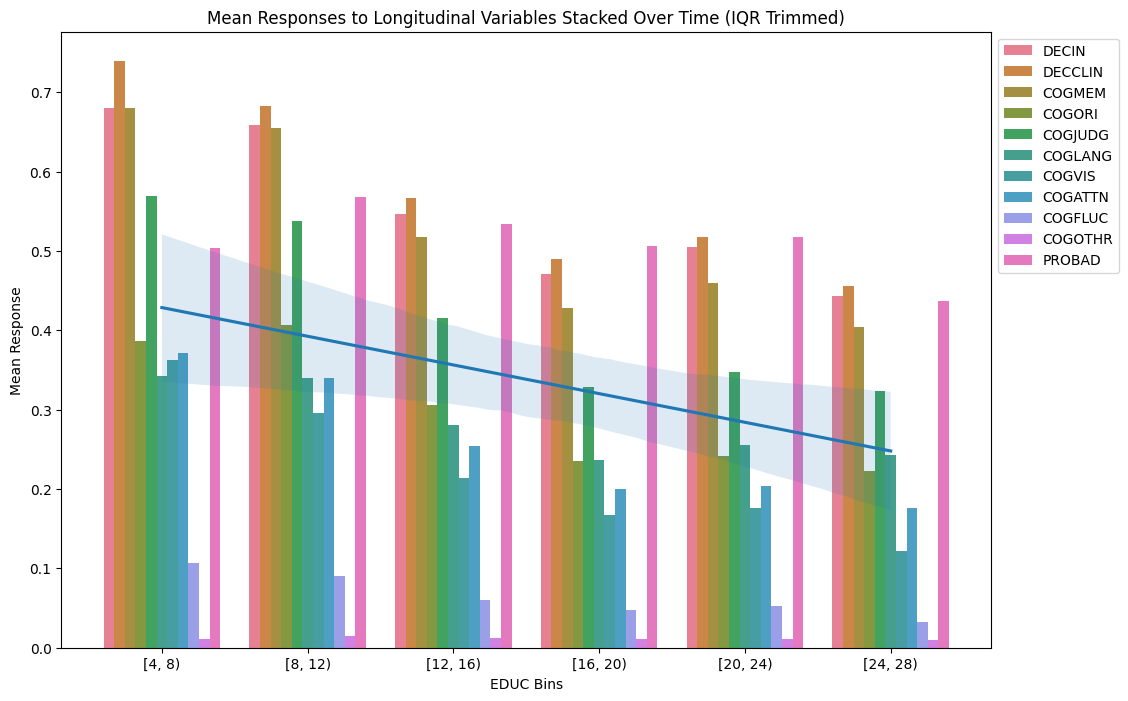

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Chart 1
bin_edges = np.arange(0, 37, 4)

Q1 = df['EDUC'].quantile(0.25)
Q3 = df['EDUC'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_trimmed = df[(df['EDUC'] >= lower_bound) & (df['EDUC'] <= upper_bound)]
df_trimmed['EDUC_bins'] = pd.cut(df_trimmed['EDUC'], bins=bin_edges, include_lowest=True, right=False)
df_trimmed = df_trimmed.sort_values(by='EDUC_bins')
mean_responses = df_trimmed.groupby('EDUC_bins')[longitudinal].mean().reset_index()
mean_responses_melted = pd.melt(mean_responses, id_vars='EDUC_bins', var_name='Variable', value_name='Mean Response')
plt.figure(figsize=(12, 8))
sns.barplot(x='EDUC_bins', y='Mean Response', hue='Variable', data=mean_responses_melted)
sns.regplot(x=mean_responses_melted['EDUC_bins'].cat.codes, y=mean_responses_melted['Mean Response'], scatter=False, ax=plt.gca())
plt.xlabel('EDUC Bins')
plt.ylabel('Mean Response')
plt.title('Mean Responses to Longitudinal Variables Stacked Over Time (IQR Trimmed)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\2283560040.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['EDUC_bins'] = pd.cut(df_trimmed['EDUC'], bins=bin_edges, include_lowest=True, right=True)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\2283560040.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_responses = df_trimmed.groupby('EDUC_bins')[longitudinal].mean().reset_index()
c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pas

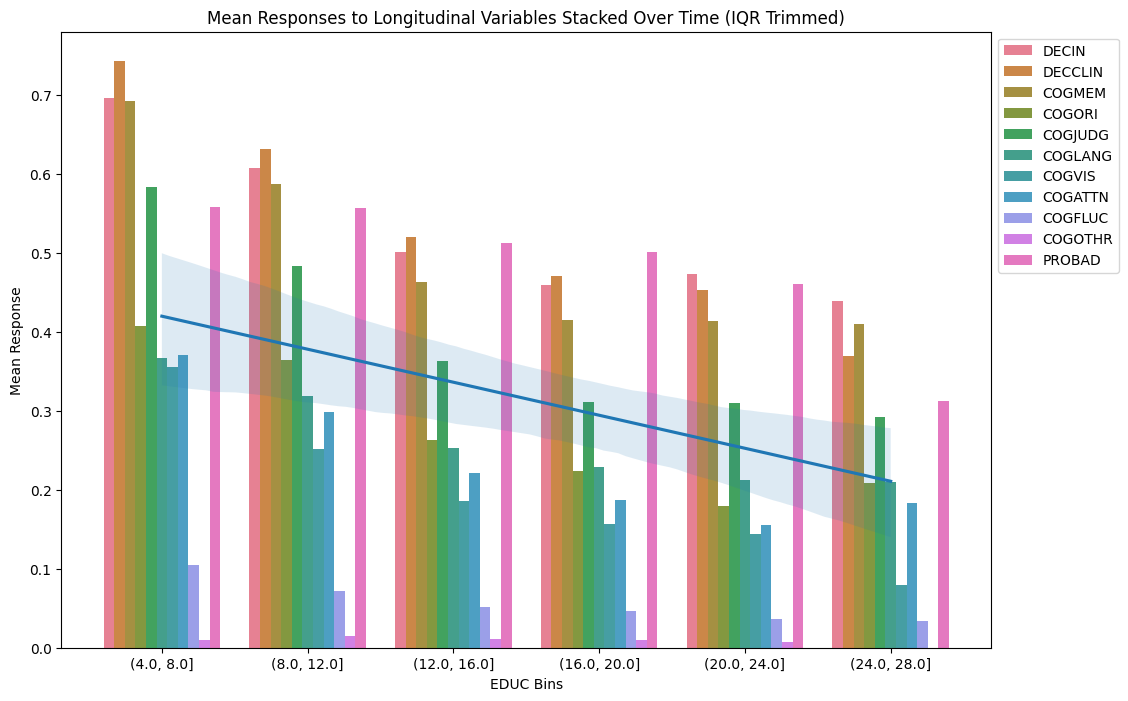

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Chart 1
bin_edges = np.arange(0, 37, 4)

Q1 = df['EDUC'].quantile(0.25)
Q3 = df['EDUC'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_trimmed = df[(df['EDUC'] >= lower_bound) & (df['EDUC'] <= upper_bound)]
df_trimmed['EDUC_bins'] = pd.cut(df_trimmed['EDUC'], bins=bin_edges, include_lowest=True, right=True)
df_trimmed = df_trimmed.sort_values(by='EDUC_bins')
mean_responses = df_trimmed.groupby('EDUC_bins')[longitudinal].mean().reset_index()
mean_responses_melted = pd.melt(mean_responses, id_vars='EDUC_bins', var_name='Variable', value_name='Mean Response')
plt.figure(figsize=(12, 8))
sns.barplot(x='EDUC_bins', y='Mean Response', hue='Variable', data=mean_responses_melted)
sns.regplot(x=mean_responses_melted['EDUC_bins'].cat.codes, y=mean_responses_melted['Mean Response'], scatter=False, ax=plt.gca())
plt.xlabel('EDUC Bins')
plt.ylabel('Mean Response')
plt.title('Mean Responses to Longitudinal Variables Stacked Over Time (IQR Trimmed)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()